# Data Exploration for TREC RF 2010 Crowdsourced Judgments

This notebook provides an exploratory analysis of the TREC RF 2010 crowdsourced dataset. The dataset includes relevance judgments provided by workers on Amazon Mechanical Turk (MTurk) for various document-query pairs. The aim is to understand the data's structure, distribution, and key patterns before applying aggregation methods.


In [1]:
# Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Set plot style for consistency
sns.set(style="whitegrid")


## 1. Load the Dataset
We load the dataset from the `trec-rf10-data.txt` file, which is tab-separated and contains five columns: `topicID`, `workerID`, `docID`, `gold` (gold labels), and `label` (worker-provided labels). Let’s preview the first few rows.


In [2]:
# File path to the dataset
file_path = "trec-rf10-data.txt"

# Load the data
data = pd.read_csv(file_path, sep="\t", header=0)

# Display the first few rows
print("First 5 rows of the dataset:")
print(data.head())


First 5 rows of the dataset:
   topicID workerID                      docID  gold  label
0    20002       w1  clueweb09-en0000-66-24091    -1      0
1    20002       w1  clueweb09-en0001-31-15410    -1      0
2    20002       w1  clueweb09-en0000-05-22942    -1      0
3    20002       w1  clueweb09-en0000-05-22943    -1      0
4    20002       w1  clueweb09-en0006-85-33191     2      2


## 2. Dataset Overview
Next, we examine the structure and general properties of the dataset, including its shape, column data types, and basic descriptive statistics.


In [3]:
# Overview of the dataset
print("\nDataset Overview:")
print(data.info())

# Descriptive statistics
print("\nDescriptive statistics:")
print(data.describe())



Dataset Overview:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 98453 entries, 0 to 98452
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   topicID   98453 non-null  int64 
 1   workerID  98453 non-null  object
 2   docID     98453 non-null  object
 3   gold      98453 non-null  int64 
 4   label     98453 non-null  int64 
dtypes: int64(3), object(2)
memory usage: 3.8+ MB
None

Descriptive statistics:
            topicID          gold         label
count  98453.000000  98453.000000  98453.000000
mean   20392.020233     -0.677603      0.736920
std      316.365896      0.886959      1.052028
min    20002.000000     -2.000000     -2.000000
25%    20144.000000     -1.000000      0.000000
50%    20308.000000     -1.000000      1.000000
75%    20642.000000     -1.000000      2.000000
max    20996.000000      2.000000      2.000000


## 3. Data Exploration: Key Metrics
We compute the following basic statistics to understand the data:
- Number of unique workers (`workerID`).
- Number of unique tasks (unique combinations of `topicID` and `docID`).
- Total number of judgments.


In [4]:
# Compute basic statistics
num_workers = data['workerID'].nunique()
num_tasks = data[['topicID', 'docID']].drop_duplicates().shape[0]
num_judgments = data.shape[0]

print(f"\nNumber of Workers: {num_workers}")
print(f"Number of Unique Tasks: {num_tasks}")
print(f"Total Number of Judgments: {num_judgments}")



Number of Workers: 766
Number of Unique Tasks: 20232
Total Number of Judgments: 98453


## 4. Label Distributions
### Distribution of Gold Labels
We examine the distribution of gold-standard labels (`gold`) provided by NIST to assess the dataset's class balance.

### Distribution of Worker Labels
We also analyze the distribution of worker-provided labels (`label`) to understand the variability in judgments.


In [5]:
# Distribution of Gold Labels
gold_counts = data['gold'].value_counts()
print("\nDistribution of Gold Labels:")
print(gold_counts)

# Distribution of Worker Labels
label_counts = data['label'].value_counts()
print("\nDistribution of Worker Labels:")
print(label_counts)



Distribution of Gold Labels:
-1    72274
 0     9163
 1     5894
-2     5644
 2     5478
Name: gold, dtype: int64

Distribution of Worker Labels:
 1    36036
 0    30819
 2    24928
-2     6670
Name: label, dtype: int64


## 5. Worker Participation
We compute and visualize the number of judgments per worker to understand worker participation patterns.



Judgments per Worker (Top 5 Workers):
w108    7920
w101    5229
w102    3385
w103    2880
w675    2802
Name: workerID, dtype: int64


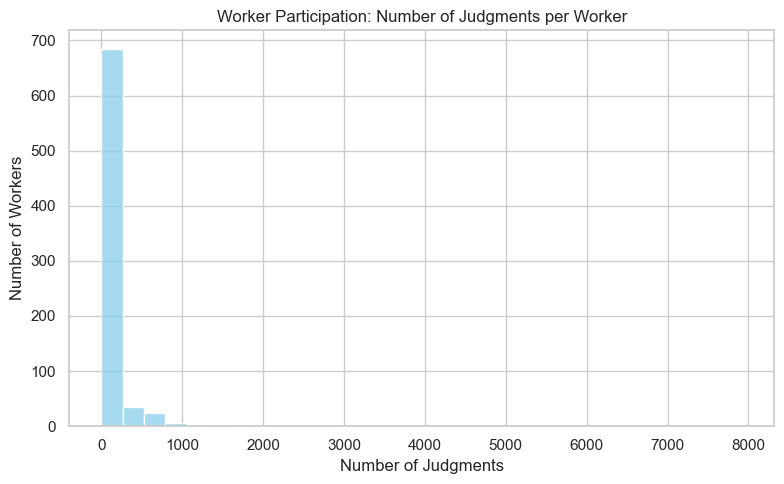

In [6]:
# Number of judgments per worker
worker_counts = data['workerID'].value_counts()

print("\nJudgments per Worker (Top 5 Workers):")
print(worker_counts.head(5))

# Plot: Worker participation histogram
plt.figure(figsize=(8, 5))
sns.histplot(worker_counts, bins=30, kde=False, color="skyblue")
plt.title("Worker Participation: Number of Judgments per Worker")
plt.xlabel("Number of Judgments")
plt.ylabel("Number of Workers")
plt.tight_layout()
plt.savefig("worker_participation.png")  # Save the figure
plt.show()


## 6. Task Coverage
We analyze the number of workers contributing to each task to understand task coverage. Tasks with more workers may benefit from higher label reliability due to redundancy.



Number of Workers per Task (Top 5 Tasks):
topicID  docID                    
20002    clueweb09-en0000-05-22942    5
         clueweb09-en0000-05-22943    5
         clueweb09-en0000-66-24091    5
         clueweb09-en0001-31-15410    5
         clueweb09-en0001-52-00915    5
dtype: int64


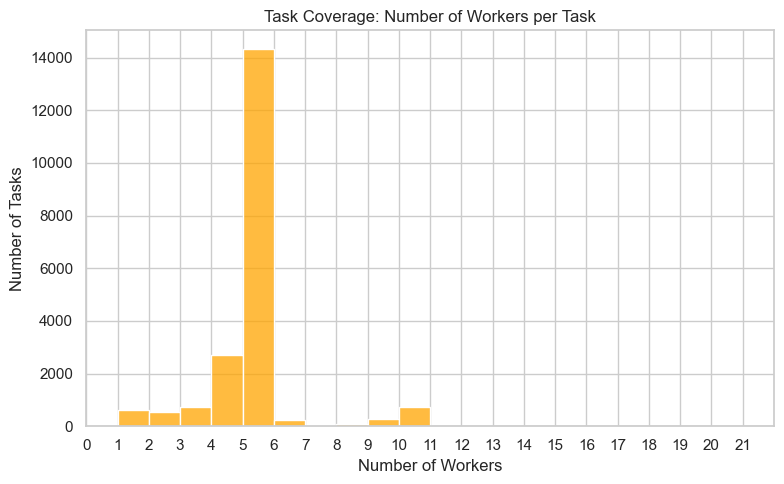

In [7]:
# Number of workers per task
tasks = data.groupby(['topicID', 'docID']).size()

print("\nNumber of Workers per Task (Top 5 Tasks):")
print(tasks.head(5))

# Plot: Workers per task histogram
plt.figure(figsize=(8, 5))
bins = range(0, tasks.max() + 2)
sns.histplot(tasks, bins=bins, kde=False, color="orange")
plt.xticks(np.arange(0, tasks.max() + 1, step=1))
plt.xlim(0, tasks.max() + 1)
plt.title("Task Coverage: Number of Workers per Task")
plt.xlabel("Number of Workers")
plt.ylabel("Number of Tasks")
plt.tight_layout()
plt.savefig("task_coverage.png")  # Save the figure
plt.show()


## 7. Analysis of Gold Labels
We analyze the proportion of tasks with gold labels and visualize their distribution.



Proportion of Tasks with Gold Labels: 26.59%


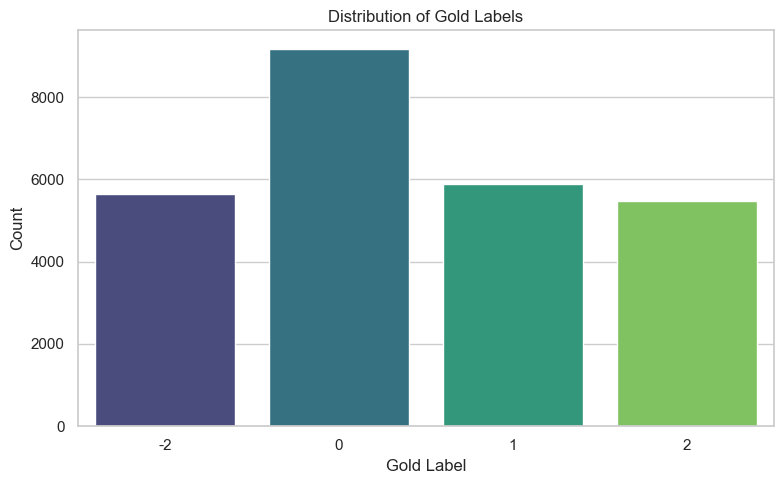

In [8]:
# Proportion of tasks with gold labels
gold_present = data[data['gold'] != -1]
gold_proportion = len(gold_present) / len(data)
print(f"\nProportion of Tasks with Gold Labels: {gold_proportion:.2%}")

# Plot: Gold label distribution
plt.figure(figsize=(8, 5))
sns.countplot(x='gold', data=gold_present, palette="viridis")
plt.title("Distribution of Gold Labels")
plt.xlabel("Gold Label")
plt.ylabel("Count")
plt.tight_layout()
plt.savefig("gold_label_distribution.png")  # Save the figure
plt.show()


## 8. Worker Labels vs. Gold Labels
We compare worker-provided labels with gold labels for tasks that have gold-standard judgments, visualizing this comparison to understand agreement levels.


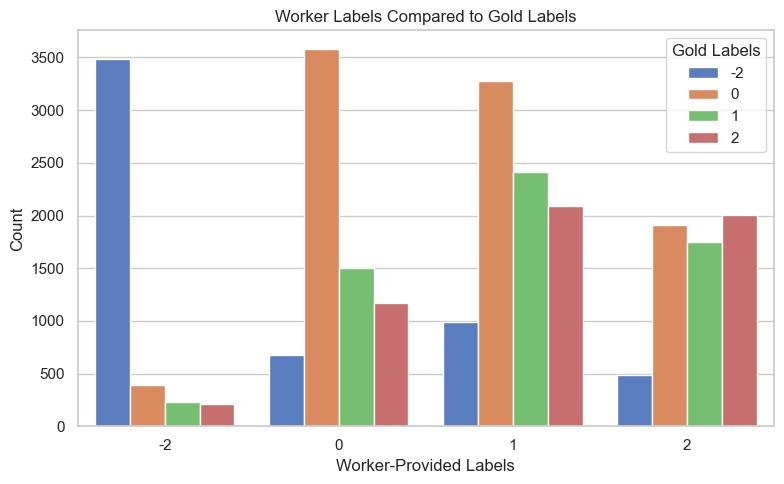

In [9]:
# Filter tasks with gold labels
gold_labeled_data = data[data['gold'] != -1]

# Plot: Worker labels vs. gold labels
plt.figure(figsize=(8, 5))
sns.countplot(x='label', hue='gold', data=gold_labeled_data, palette="muted")
plt.title("Worker Labels Compared to Gold Labels")
plt.xlabel("Worker-Provided Labels")
plt.ylabel("Count")
plt.legend(title="Gold Labels")
plt.tight_layout()
plt.savefig("worker_vs_gold_labels.png")  # Save the figure
plt.show()


## 9. Summary Statistics per Worker
Finally, we compute aggregated statistics per worker, including the total number of tasks completed and the number of tasks with gold labels. These statistics are saved for further analysis in subsequent experiments.


In [10]:
# Worker summary statistics
worker_summary = data.groupby('workerID').agg(
    num_tasks=('workerID', 'count'),
    num_gold_tasks=('gold', lambda x: (x != -1).sum())
).reset_index()

print("\nWorker Summary Statistics (Top 5 Rows):")
print(worker_summary.head(5))

# Save to CSV
worker_summary.to_csv("worker_summary_statistics.csv", index=False)
print("\nWorker summary statistics saved to 'worker_summary_statistics.csv'.")



Worker Summary Statistics (Top 5 Rows):
  workerID  num_tasks  num_gold_tasks
0       w1       1271             266
1      w10        165              34
2     w100        366              77
3     w101       5229            1354
4     w102       3385             796

Worker summary statistics saved to 'worker_summary_statistics.csv'.
